<div align="center">
    <h1>Aprendizaje automático</h1>
    <h3>Fundamentos y aplicaciones en meteorología del espacio</h3>
    <h4>TP 0: Introducción</h4>
     <h5>Alumno: Federico Iza</h5>
</div>

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from utils.plot import config_plots
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

In [77]:
%matplotlib inline
config_plots()

In [78]:
hours = [i for i in range(24)]

In [79]:
# Read the dataset.
df = pd.read_csv('../data/Dst.txt',
                 skiprows=15, header=None,
                 sep='\s+',  # Permits more than one space
                 )

In [80]:
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,DST1501*01,X220,0,-18,-18,-20,-20,-19,-20,-19,...,1,-2,-3,-4,-8,-12,-13,-12,-19,-11
1,DST1501*02,X220,0,-26,-26,-22,-13,-11,-11,-11,...,-9,-5,-8,-22,-36,-49,-49,-43,-36,-17
2,DST1501*03,X220,0,-36,-42,-34,-27,-16,-25,-36,...,-18,-20,-20,-22,-21,-20,-19,-19,-20,-26
3,DST1501*04,X220,0,-21,-22,-20,-16,-16,-19,-26,...,-62,-68,-57,-62,-65,-68,-78,-67,-57,-44
4,DST1501*05,X220,0,-67,-51,-42,-38,-41,-51,-55,...,-31,-28,-29,-31,-35,-40,-46,-43,-42,-41
5,DST1501*06,X220,0,-44,-40,-38,-35,-32,-37,-39,...,-29,-32,-30,-32,-20,-22,-27,-26,-18,-34
6,DST1501*07,X220,0,-14,-5,0,-2,-2,-6,-1,...,-98,-87,-73,-62,-50,-47,-39,-49,-51,-50
7,DST1501*08,X220,0,-54,-58,-47,-48,-48,-41,-48,...,-40,-43,-40,-38,-38,-35,-35,-38,-41,-46
8,DST1501*09,X220,0,-42,-44,-42,-38,-32,-32,-35,...,-30,-34,-36,-35,-34,-33,-28,-24,-26,-35
9,DST1501*10,X220,0,-32,-37,-29,-26,-25,-22,-27,...,-17,-19,-24,-24,-23,-16,-20,-17,-14,-25


In [90]:
# Select three consecutive days in the dataset.
df.loc[[13, 14, 15], 3:df.shape[1]-2]

,3,4,5,6,7,8,9,10,11,12,...,17,18,19,20,21,22,23,24,25,26
13,-26,-25,-23,-23,-23,-20,-17,-15,-14,-16,...,-21,-15,-13,-14,-16,-17,-15,-13,-13,-14
14,-16,-15,-15,-14,-13,-13,-13,-17,-14,-7,...,-19,-18,-20,-18,-17,-15,-13,-11,-13,-12
15,-11,-9,-7,-8,-21,-21,-20,-22,-15,-11,...,-17,-14,-15,-18,-17,-19,-19,-13,-13,-14


In [81]:
x = np.array([i for i in range(24)]*3)
y = np.array(df.loc[[13, 14, 15], 3:df.shape[1]-2]).flatten()

In [82]:
# Sort arrays
sort_idx = np.argsort(x)
x = x[sort_idx]
y = y[sort_idx]

## Ajuste sobre *todos* los datos

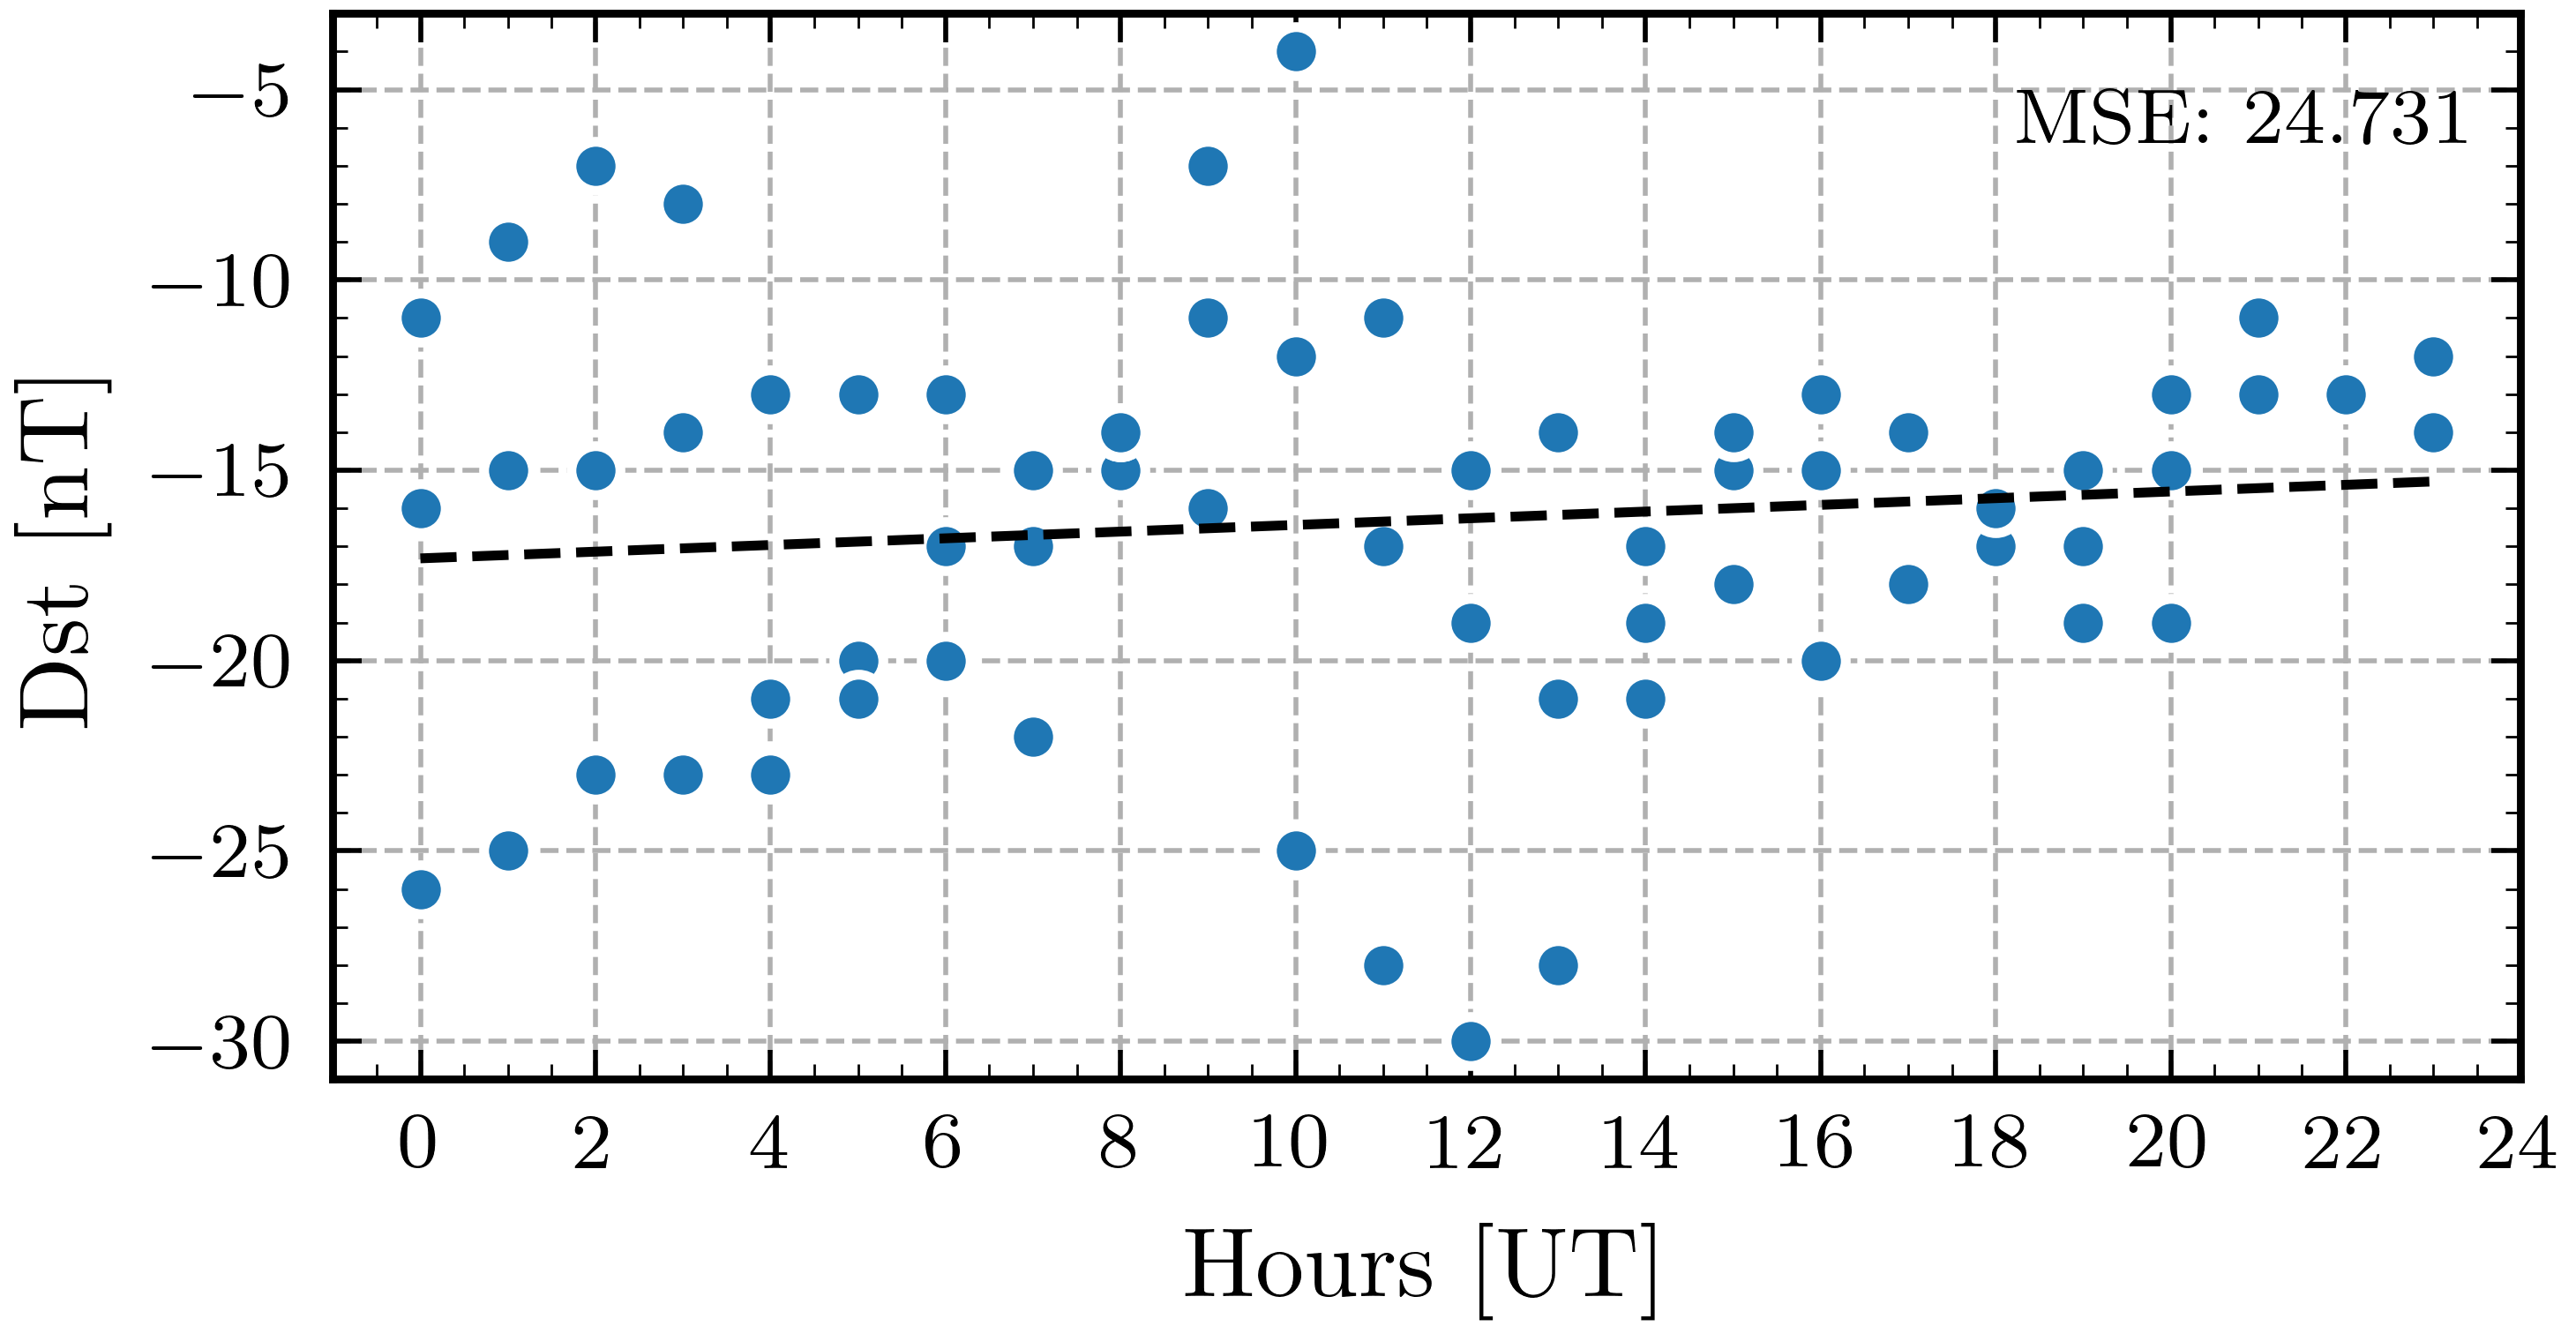

In [83]:
fig = plt.figure(figsize=(4, 2), facecolor='white')
gs = fig.add_gridspec(ncols=1, nrows=1, hspace=0, wspace=0)
ax = gs.subplots(sharex=True, sharey=True)

ax.label_outer()
ax.tick_params(which='both', direction="in")
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', lw=.5)
ax.minorticks_on()
ax.set_xlabel('Hours [UT]')
ax.set_ylabel('Dst [nT]')
ax.set_xlim(-1, 24)
ax.set_ylim(-31, -3)
ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])
# ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])

ax.plot(x, y, color='tab:blue',
        marker='o', mec='white',
        lw=0, ms=5, label='Data')

# Linear fit
model = LinearRegression()
model.fit(x.reshape(-1, 1), y.reshape(-1, 1))
# print(model.coef_)
y_pred = model.predict(x.reshape(-1, 1))
ax.plot(x, y_pred.flatten(), color='k',
        ls='--', lw=1, label='Fit')
mse = mean_squared_error(y.reshape(-1, 1), y_pred)
ax.text(23.5, -5, f'MSE: {round(mse, 3)}', va='top', ha='right')

fig.savefig('../images/tp0_fig1.pdf')
plt.show()

## Data splitting

A continuación de separan los datos usando la opción `shuffle=True`. Se entrena un modelo lineal usando esta separación y se calcula el MSE sobre los datos de prueba.

In [84]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    # shuffle=False,
                                                    test_size=0.2,
                                                    random_state=42)

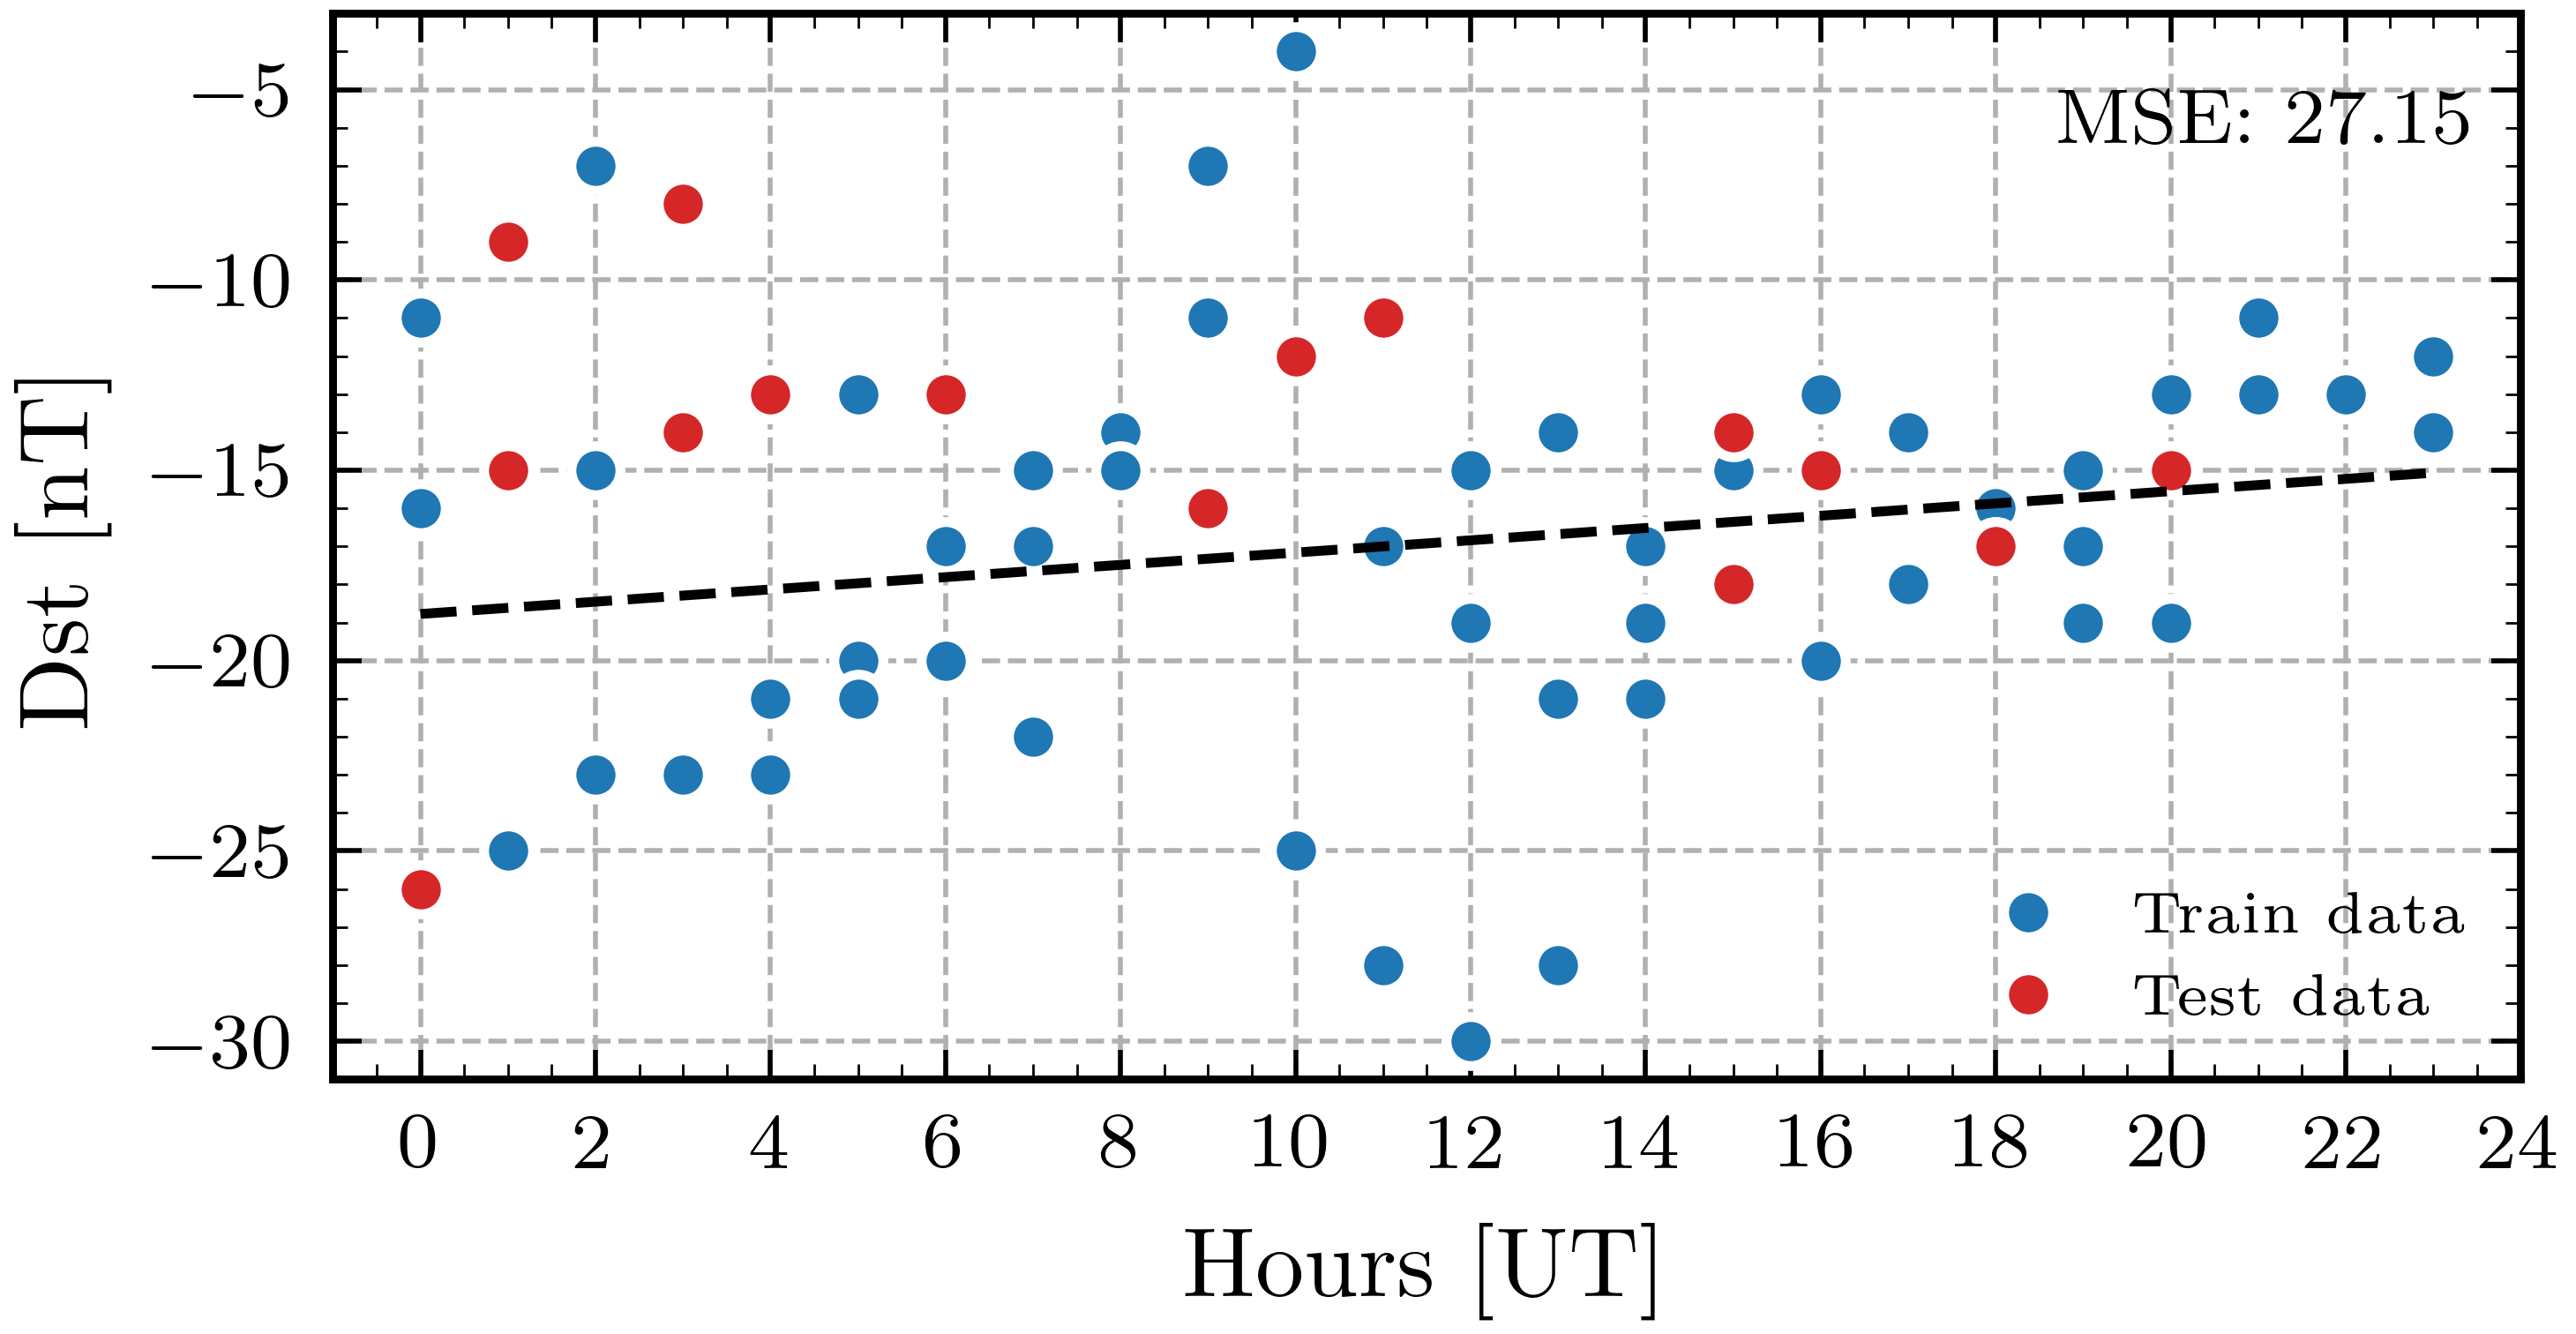

In [85]:
fig = plt.figure(figsize=(4, 2), facecolor='white')
gs = fig.add_gridspec(ncols=1, nrows=1, hspace=0, wspace=0)
ax = gs.subplots(sharex=True, sharey=True)

ax.label_outer()
ax.tick_params(which='both', direction="in")
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', lw=.5)
ax.minorticks_on()
ax.set_xlabel('Hours [UT]')
ax.set_ylabel('Dst [nT]')
ax.set_xlim(-1, 24)
ax.set_ylim(-31, -3)
ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])
# ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])


# Plot data
ax.plot(x_train, y_train, color='tab:blue',
        marker='o', mec='white',
        ms=5, lw=0, label='Train data')
ax.plot(x_test, y_test, color='tab:red',
        marker='o', mec='white',
        ms=5, lw=0, label='Test data')

# Linear fit
model = LinearRegression()
model.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))
# print(model.coef_)
y_pred = model.predict(x_test.reshape(-1, 1))
ax.plot(x, model.predict(x.reshape(-1, 1)),
        color='k', ls='--', lw=1)
mse = mean_squared_error(y_test.reshape(-1, 1), y_pred)
ax.text(23.5, -5, f'MSE: {round(mse, 3)}', va='top', ha='right')
ax.legend(loc='lower right')

fig.savefig('../images/tp0_fig2.pdf')
plt.show()

A continuación de separan los datos usando la opción `shuffle=False`. Se entrena un modelo lineal usando esta separación y se calcula el MSE sobre los datos de prueba.

In [88]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    shuffle=False,
                                                    test_size=0.2,
                                                    random_state=42)

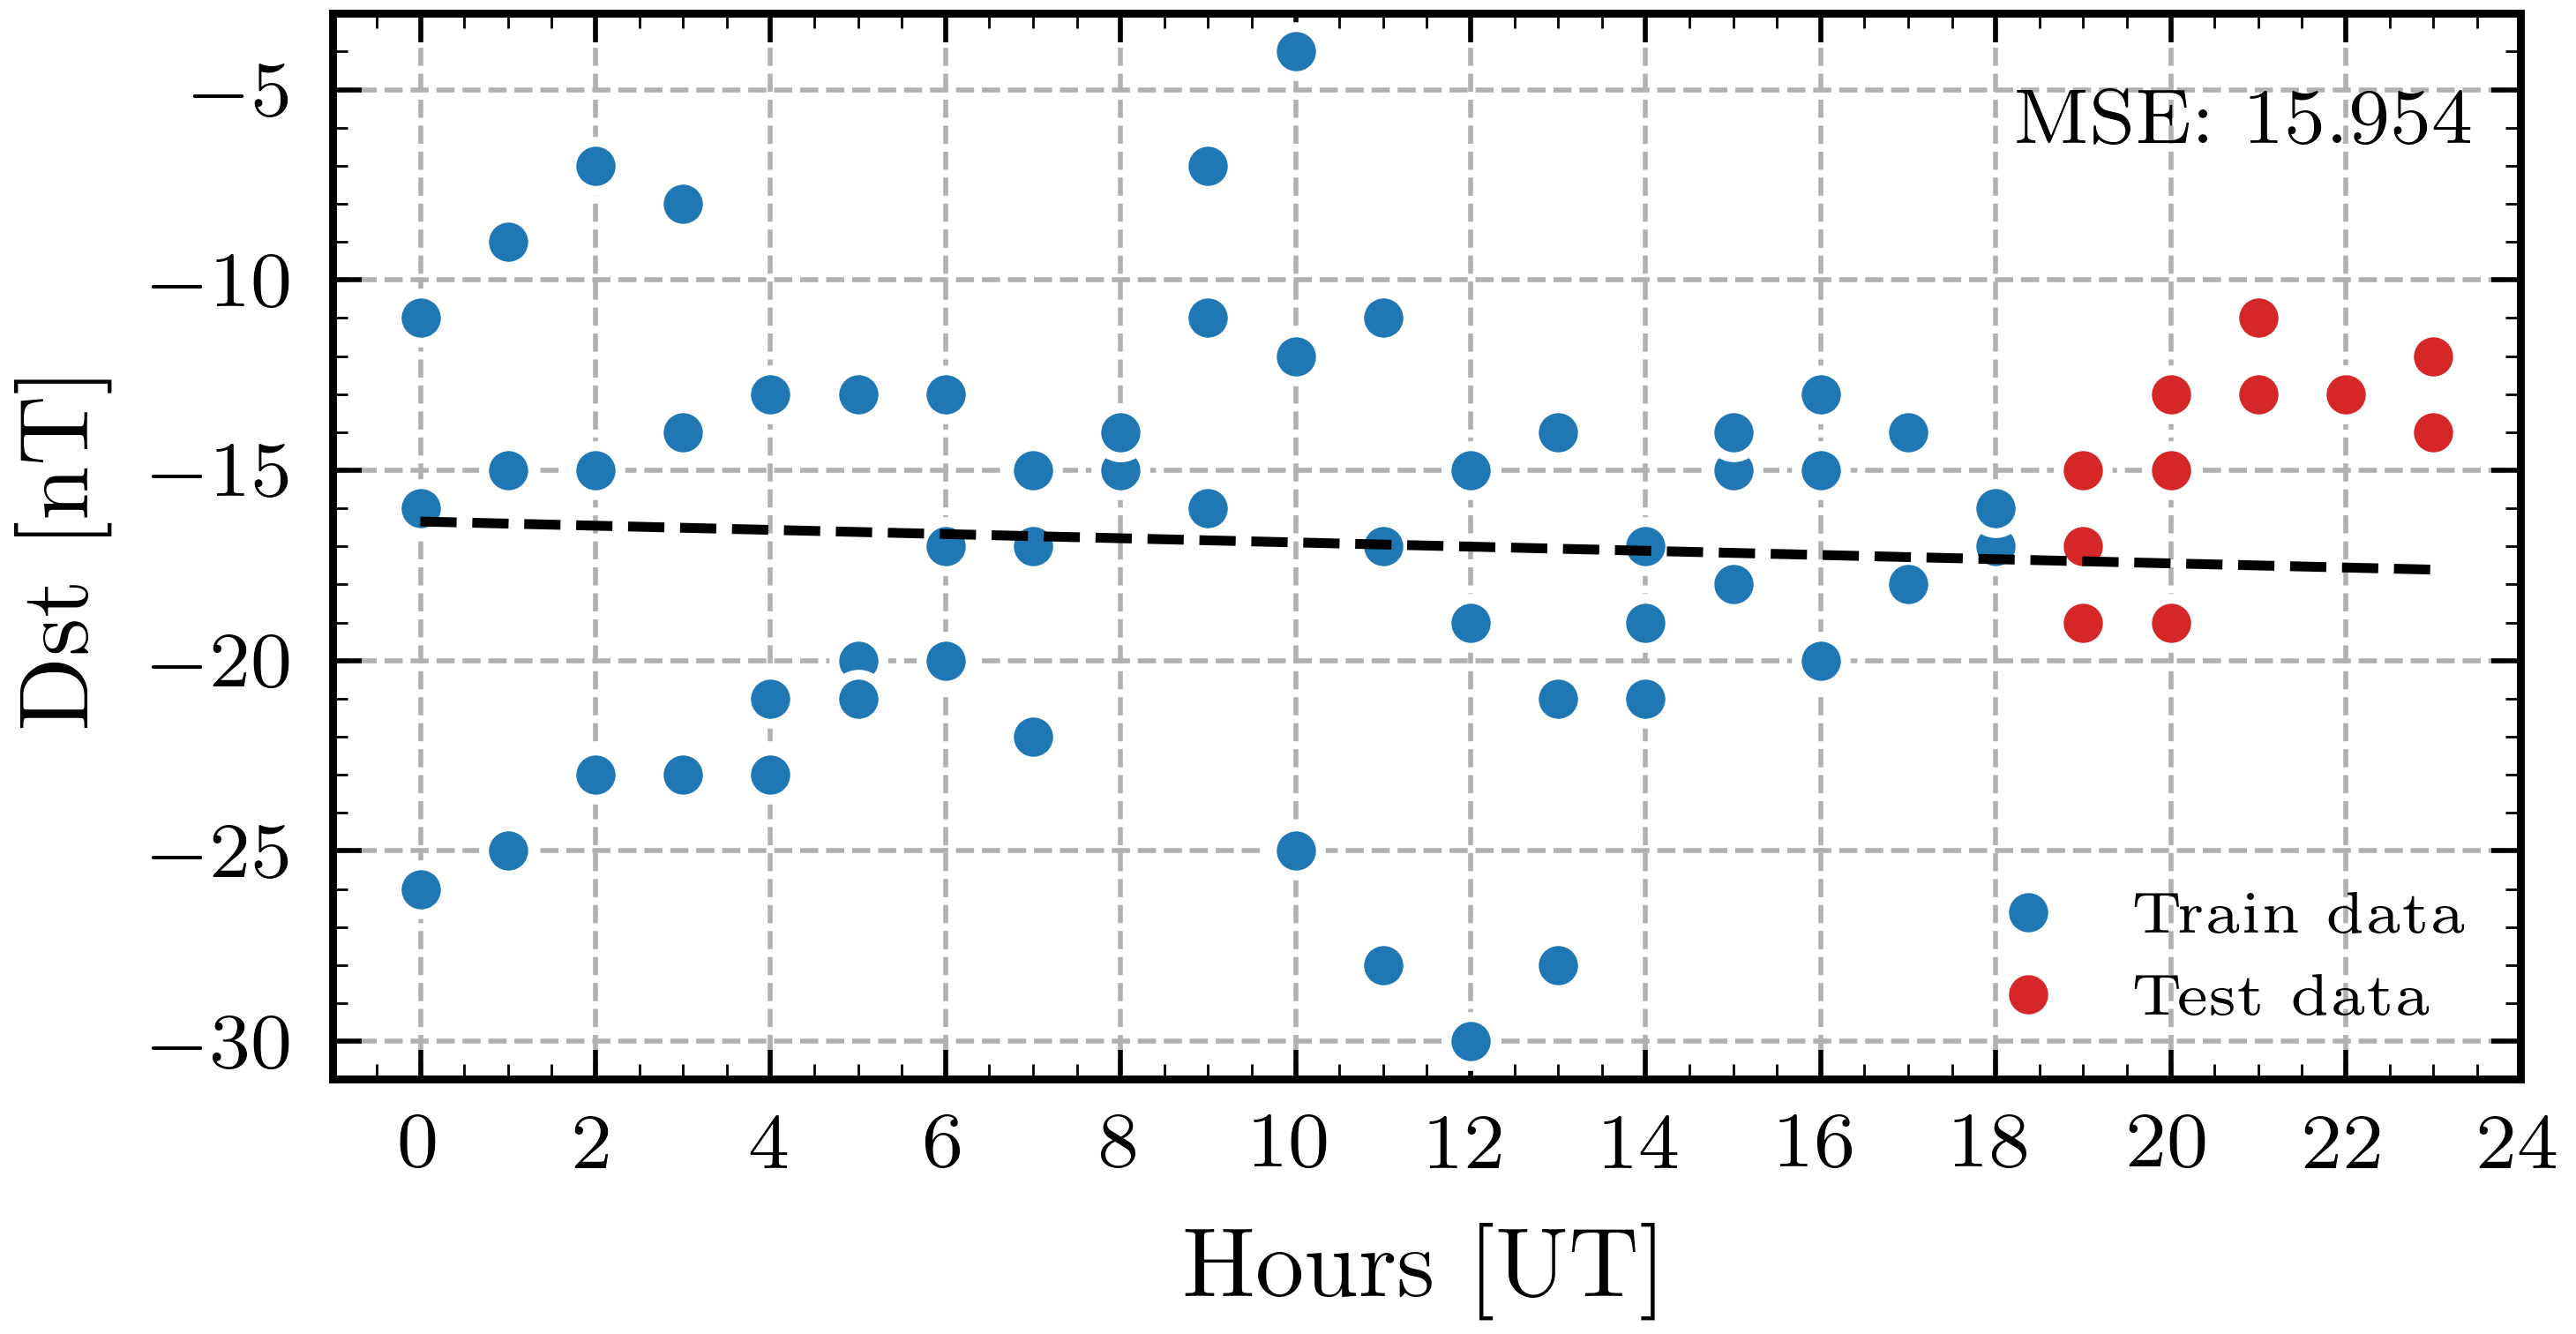

In [89]:
fig = plt.figure(figsize=(4, 2), facecolor='white')
gs = fig.add_gridspec(ncols=1, nrows=1, hspace=0, wspace=0)
ax = gs.subplots(sharex=True, sharey=True)

ax.label_outer()
ax.tick_params(which='both', direction="in")
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', lw=.5)
ax.minorticks_on()
ax.set_xlabel('Hours [UT]')
ax.set_ylabel('Dst [nT]')
ax.set_xlim(-1, 24)
ax.set_ylim(-31, -3)
ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])
# ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1])


# Plot data
ax.plot(x_train, y_train, color='tab:blue',
        marker='o', mec='white',
        ms=5, lw=0, label='Train data')
ax.plot(x_test, y_test, color='tab:red',
        marker='o', mec='white',
        ms=5, lw=0, label='Test data')

# Linear fit
model = LinearRegression()
model.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))
# print(model.coef_)
y_pred = model.predict(x_test.reshape(-1, 1))
ax.plot(x, model.predict(x.reshape(-1, 1)),
        color='k', ls='--', lw=1)
mse = mean_squared_error(y_test.reshape(-1, 1), y_pred)
ax.text(23.5, -5, f'MSE: {round(mse, 3)}', va='top', ha='right')
ax.legend(loc='lower right')

fig.savefig('../images/tp0_fig3.pdf')
plt.show()